# Task_1 : Prediction Using Supervised Machine Learning
### 'By Pyda Venkata Hem Charan

## Probelm Statement

Predict the percentage score of a student based on the no. of hours studied.

This involves a simple linear regression model as it includes just one dependent and one independent variable.

What will be the score, if a student studied for 9.25 hrs/ day?

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the Dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Exploring the Dataset

In [3]:
# Shape of the dataset
data.shape

(25, 2)

In [4]:
# Basic information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# To obtain numerical functional reults of each column of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

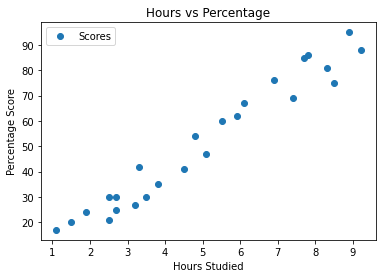

In [6]:
# Plotting the data points on axis
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [7]:
# Importinf Seaborn Library
import seaborn as sns

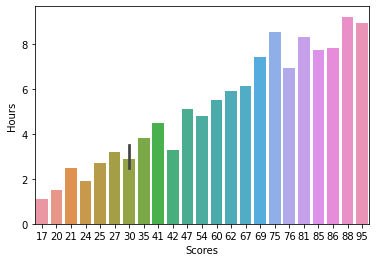

In [8]:
# Bar Plot
ax = sns.barplot(x=data["Scores"], y=data["Hours"])

Here, we can observe a black line on the "Score = 30" bar which indicates as an "Error Bar". 

Let us understand , how it is declared as error bar!

In [9]:
# Standard Deviation of each column of data
print(data.std(axis=0))

Hours      2.525094
Scores    25.286887
dtype: float64


In [10]:
# data which we found the error
data.loc[data['Scores'] == 30]

,Hours,Scores
4,3.5,30
16,2.5,30
20,2.7,30


As the students who scores "30" are under different segments according to Standard Deviation, they are stated as Error Bars but not as an Absolute Error.

This won't be an error if we add some more data points or some other variable. So, here I am not considering this as an absolute error

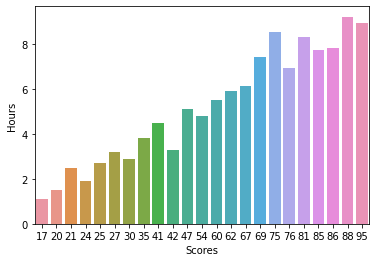

In [11]:
# Barplot without Showing Error Bars
ax = sns.barplot(x=data["Scores"], y=data["Hours"],  ci = None)

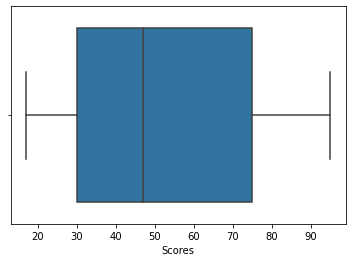

In [12]:
# Box Plot
ax = sns.boxplot(x=data["Scores"])

By this Boxplot, we can understand there are no significant outliers in the given dataset.

#### Prepering the Data

Now, we are dividing the dataset under two variable categories. Dependent and Independent Variables

In [13]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [14]:
# Splitting the Data into Train and Test Data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

#### Training the Algorithm

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [16]:
print(regressor.coef_)
print(regressor.intercept_)

[9.91065648]
2.018160041434683


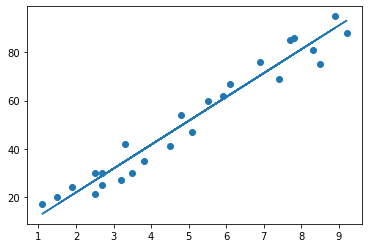

In [17]:
# Plotting Regression Line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### Making Predictions

In [18]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating the Model

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Root Mean Squared Error: 4.6474476121003665


In [21]:
from sklearn.metrics import r2_score
print("R_Squared Value:", r2_score(y_test, y_pred))

R_Squared Value: 0.9454906892105356


In [22]:
hours = float(input("No. of Hours:"))
if regressor.predict([[hours]])[0] <= 100:
    print('Predicted Score: ', regressor.predict([[hours]])[0])
else:
    print("Wooah!, It is more than enough to acheive 100%")

No. of Hours: 9.25


Predicted Score:  93.69173248737538


### Conclusion

If a student studies for 9.25 Hrs/day. Then, he/she will score 93.69 %